In [57]:
from ultils import *
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels
import numpy as np
from sklearn import metrics

In [62]:
prosody = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/Czech/Acoustic/prosody.csv')
intensity = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/Czech/Acoustic/Harmonics.csv')
prosody['intensity'] = intensity['stddev_intensity'].tolist() #for em in zip(intensity['sound_filepath'].tolist(), prosody['id'].tolist()):
prosody = prosody.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 'F0skew',
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
#'1F0std',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

prosody['label']=prosody['id'].str.split('_').str[0]
first_column = prosody.pop('intensity')
prosody.insert(0, 'intensity_std', first_column)
proosdy = prosody.drop(columns=['Unnamed: 0', 'label'])

# Add tasks
tasks = []
names =prosody['id'].tolist()
for e in names:
    ok = e.split("_", 2)[2]
    ok = ok.split("_", 1)[0]
    tasks.append(ok)
prosody['tasks'] = tasks
prosody['names'] = [elem.split("_")[1] for elem in prosody['id'].tolist()]
df = prosody
df=df.drop(columns=['Unnamed: 0'])

# group by task
task = df.groupby("tasks")
read = task.get_group("readtext")
monologue = task.get_group("monologue")

## Monologue

In [71]:
grouped = monologue.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = monologue.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monologue.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(monologue.columns[:-4])])

with open('/export/b15/afavaro/Frontiers/submission/CZECH/ACOUSTIC/Results/monologue_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/CZECH/ACOUSTIC/Results/monologue_new.txt')
holm_correction(kruskal_1)

(['kruskal results for F0std controls vs. parkinson 0.011298345511121239 '],
 [0.03389503653336372])

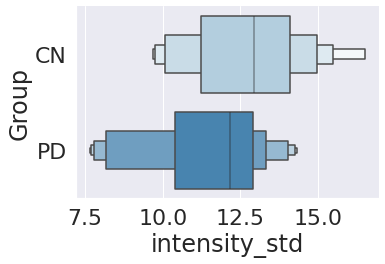

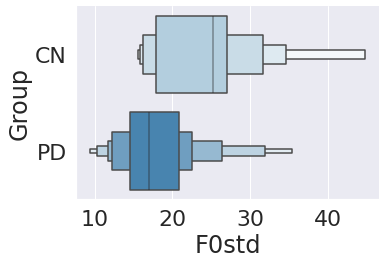

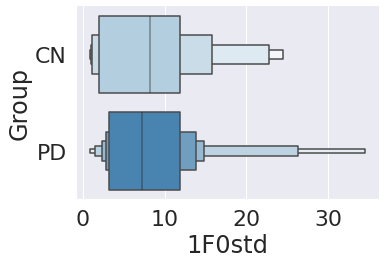

In [72]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Read Passage 

In [73]:
grouped = read.groupby("label")  #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = read.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(read.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(read.columns[:-4])])

with open('/export/b15/afavaro/Frontiers/submission/CZECH/ACOUSTIC/Results/read_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/CZECH/ACOUSTIC/Results/read_new.txt')
holm_correction(kruskal_1)

(['kruskal results for intensity_std controls vs. parkinson 0.03026028002047123 ',
  'kruskal results for F0std controls vs. parkinson 0.01496052112078014 '],
 [0.04539042003070685, 0.04488156336234042])

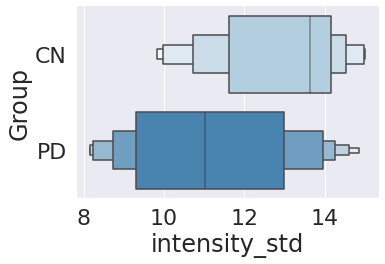

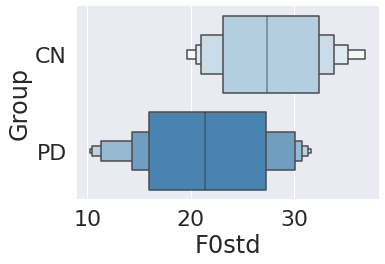

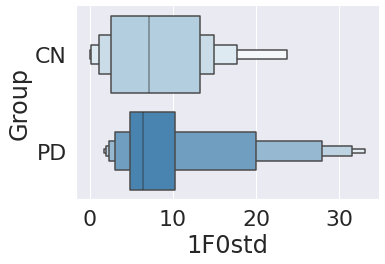

In [74]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)